In [2]:
!python --version

Python 3.8.5


In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_excel('mushrooms.xlsx')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [4]:
df.isnull().values.any()

False

In [5]:
df.groupby('class').count()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
edible,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
poisonous,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916


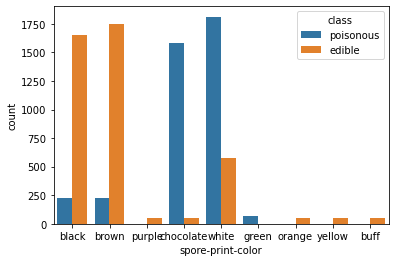

In [6]:
import seaborn as sns
ax = sns.countplot(x="spore-print-color", hue="class", data=df)

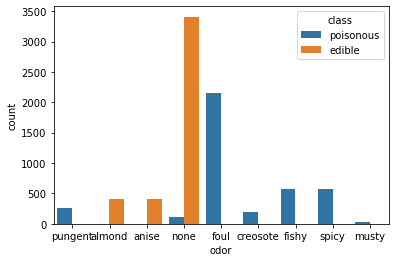

In [7]:
ax = sns.countplot(x="odor", hue="class", data=df)

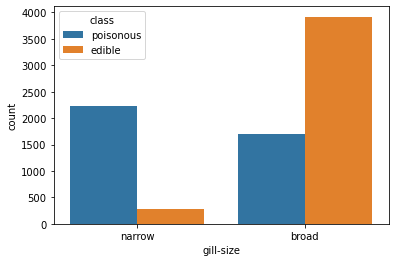

In [8]:
ax = sns.countplot(x="gill-size", hue="class", data=df)

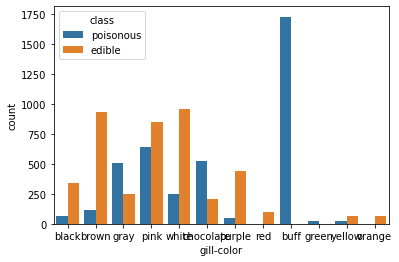

In [9]:
ax = sns.countplot(x="gill-color", hue="class", data=df)

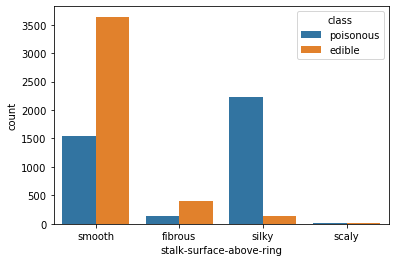

In [10]:
ax = sns.countplot(x="stalk-surface-above-ring", hue="class", data=df)

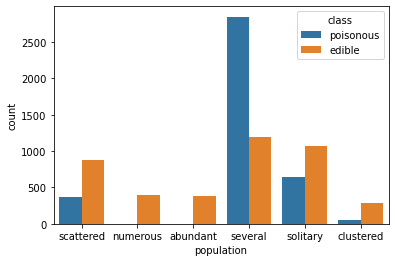

In [11]:
ax = sns.countplot(x="population", hue="class", data=df)

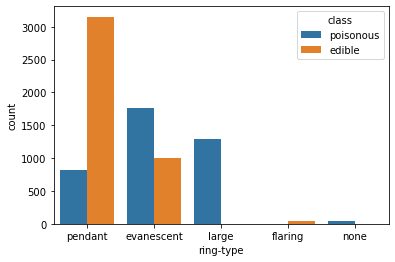

In [12]:
ax = sns.countplot(x="ring-type", hue="class", data=df)

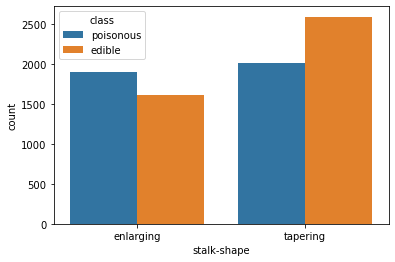

In [13]:
ax = sns.countplot(x="stalk-shape", hue="class", data=df)

In [14]:
categorical_columns = df.drop('class', axis = 1).columns
categorical_columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [15]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df['class'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                      Column                      Hypothesis
0                  cap-shape          Reject Null Hypothesis
1                cap-surface          Reject Null Hypothesis
2                  cap-color          Reject Null Hypothesis
3                    bruises          Reject Null Hypothesis
4                       odor          Reject Null Hypothesis
5            gill-attachment          Reject Null Hypothesis
6               gill-spacing          Reject Null Hypothesis
7                  gill-size          Reject Null Hypothesis
8                 gill-color          Reject Null Hypothesis
9                stalk-shape          Reject Null Hypothesis
10                stalk-root          Reject Null Hypothesis
11  stalk-surface-above-ring          Reject Null Hypothesis
12  stalk-surface-below-ring          Reject Null Hypothesis
13    stalk-color-above-ring          Reject Null Hypothesis
14    stalk-color-below-ring          Reject Null Hypothesis
15                 veil-

In [16]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(df[i])
    bon_p_value = 0.05/df[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(df['class'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,cap-shape-bell,Reject Null Hypothesis
1,cap-shape-conical,Fail to Reject Null Hypothesis
2,cap-shape-convex,Fail to Reject Null Hypothesis
3,cap-shape-flat,Fail to Reject Null Hypothesis
4,cap-shape-knobbed,Reject Null Hypothesis
...,...,...
111,habitat-meadows,Reject Null Hypothesis
112,habitat-paths,Reject Null Hypothesis
113,habitat-urban,Reject Null Hypothesis
114,habitat-waste,Reject Null Hypothesis


In [17]:
data_log = pd.get_dummies(data = df, columns = df.drop('class', axis =1).columns, drop_first =True)
data_log

,class,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_groovesmooth,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,poisonous,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,edible,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,edible,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,poisonous,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,edible,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8120,edible,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
8121,edible,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8122,poisonous,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [18]:
data_log['class'] = data_log['class'].apply(lambda x: 0 if x == 'edible' else 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_log.drop('class', axis =1), data_log['class'], test_size = 0.30, random_state = 101)


In [20]:
len(X_train.columns)

95

In [21]:
print(len(X_train),len(X_test))

5686 2438


In [22]:
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
X_test

,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_groovesmooth,cap-surface_scaly,cap-surface_smooth,cap-color_buff,cap-color_cinnamon,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
4242,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2057,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4016,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7246,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7746,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4376,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1533,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3413,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:
predictions = log_model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9991796554552912


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [27]:
log_model.coef_


array([[ 0.41461972, -0.22285367, -0.16654409, -0.1309103 , -0.67320959,
         1.2038546 ,  0.42322925,  0.67756288,  1.26186567, -0.85027997,
         0.31785833, -0.40168832,  1.0116032 , -0.29556627,  0.25781794,
         0.6140829 , -0.21614485,  0.01814076, -1.61497166,  3.80718786,
         1.00754131,  3.61761251,  0.35826412, -3.58145858,  2.82892626,
         1.06595629,  0.28281145, -2.21444424,  3.25000052, -0.63274081,
         2.15741336,  0.15661507, -0.04839643,  0.98855987, -0.15070499,
        -0.4255073 , -0.10575069, -0.5487006 , -0.17488172,  0.20205264,
        -0.84318557, -2.19533565, -0.02948557, -1.07838934, -1.79477236,
         0.17097814,  1.86834545, -0.88767393,  1.09700301,  0.42278776,
        -0.05241288,  0.25388819,  0.35826412, -0.56732554, -0.34046423,
        -0.4394034 ,  0.35187825, -0.08183341,  0.73837497,  0.24594847,
         0.35826412, -0.57665006, -0.32421309, -0.4394034 ,  0.44206239,
         0.14738366,  1.29886358, -0.20130762, -0.2

In [32]:
odds_table=pd.DataFrame(columns=["Features","Weight","Odds-Ratio"])

In [33]:
odds_table['Features']=X_train.columns

In [35]:
odds_table['Weight']=log_model.coef_[0]

In [36]:
odds_table['Odds-Ratio']=np.exp(log_model.coef_)[0]

In [37]:
odds_table

,Features,Weight,Odds-Ratio
0,cap-shape_conical,0.414620,1.513795
1,cap-shape_convex,-0.222854,0.800232
2,cap-shape_flat,-0.166544,0.846585
3,cap-shape_knobbed,-0.130910,0.877296
4,cap-shape_sunken,-0.673210,0.510069
...,...,...,...
90,habitat_meadows,0.360847,1.434544
91,habitat_paths,-0.208112,0.812116
92,habitat_urban,-0.008034,0.991999
93,habitat_waste,-1.524911,0.217640


In [38]:
odds_table.to_csv("mushrooms_explanations.csv")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
